### Machine learning classification task on artificial data

In [1]:
# define random number
rng = 13

### Imports / read files

In [2]:
# imports

import pandas as pd
import numpy as np

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as sts
from scipy.stats import spearmanr

# classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.metrics import confusion_matrix
from sklearn.ensemble import IsolationForest


In [3]:
# read data
samples_df = pd.read_csv("samples_ss21.csv", header=None)
labels_df = pd.read_csv("labels_ss21.csv", header=None)

In [4]:
samples_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,17.561347,13.898839,32.012669,12.936122,31.306079,18.890884,2.490849,12.765148,16.901000,13.800354,0.0,1.0
1,5.128995,13.782128,4.811296,12.738891,19.129982,20.756463,1.909098,12.538567,2.722167,15.217587,-4.0,5.0
2,7.726105,12.727373,2.743770,13.491890,37.552893,16.151916,1.244975,11.879479,3.031612,13.988177,-2.0,5.0
3,7.969645,14.184723,30.077857,11.055636,7.481751,25.631052,34.433366,13.565371,19.689071,13.719133,-1.0,3.0
4,6.994354,15.276706,9.529128,13.510391,66.414919,18.090147,3.772543,11.948545,3.847959,15.476232,0.0,1.0


# Task 1: Data Analysis
### 1.1 Labels

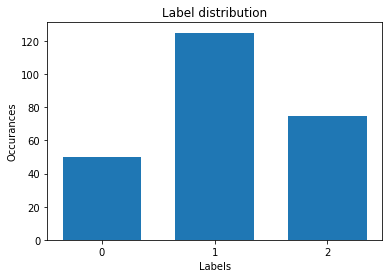

1.0    125
2.0     75
0.0     50
dtype: int64

In [5]:
# histogram, tweaked for not showing decimals after we realized we deal with discrete variable

bin_edges = np.arange(-0.5, 3.5, 1)
plt.hist(labels_df, bins = bin_edges, rwidth = 0.7)
plt.xticks(np.arange(0, 3, 1))
plt.title("Label distribution")
plt.xlabel("Labels")
plt.ylabel("Occurances")
plt.show()

labels_df.value_counts()

In [6]:
# We want to check whether the labels are sorted
labellist = labels_df[0].tolist()

print("labels are sorted:",
all(labellist[i] <= labellist[i+1] for i in range(len(labellist)-1)))

labels are sorted: True


##### Observations:
The labels are given by a discrete variable with three categories. This tells us that we are dealing with a classification rather than regression problem.

In the histogram we can see that the distribution of labels is not equal in size. We need to take this into account and stratify accordingly when splitting the data into training and test data.

Lastly we see that the labels are sorted. Since we have no indication of the data being time sensitive, we conclude that shuffling the data is the correct step.

### 1.2 Outliers

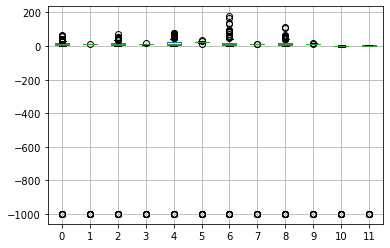

In [7]:
boxplot = samples_df.boxplot()

In [8]:
samples_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,-13.671673,-15.410192,-13.737922,-17.048846,-10.931010,-4.889805,-9.470560,-15.620038,-11.634391,-14.359042,-27.751863,-25.099850
std,167.909708,167.276671,167.935426,166.999736,168.645083,169.089449,170.166904,167.240142,168.612434,167.455102,165.185475,165.632091
min,-998.999871,-998.999542,-998.998849,-998.997938,-998.999331,-998.999119,-998.998359,-998.999515,-998.998751,-998.998391,-998.999089,-998.999903
25%,7.749428,12.143491,5.967256,10.318465,7.261285,21.692586,4.658803,12.097495,6.173279,13.321679,-1.000000,2.000000
50%,11.252738,12.795823,10.542094,11.153231,12.637496,23.659431,9.988577,12.618662,11.043224,13.917084,0.000000,3.000000
75%,17.719682,13.593506,18.467931,12.134265,22.309961,25.629186,20.924351,13.255751,20.210931,14.546408,2.000000,4.000000
max,64.792040,15.276706,71.422421,15.432175,80.706103,33.330952,177.572884,15.204299,112.458023,16.413580,4.000000,5.000000


#### There are some obvious outliers around -1000 on all features. The difference between mean and median assures this. Let's look at these values:

In [9]:
samples_df[samples_df[0] < -900]

,0,1,2,3,4,5,6,7,8,9,10,11
16,-998.999868,-998.991769,-998.996526,-998.993068,-998.990761,-998.992441,-998.996586,-998.993634,-998.998751,-998.997659,-998.996210,-998.999589
39,-998.991004,-998.999542,-998.992701,-998.990162,-998.999331,-998.995994,-998.992950,-998.990976,-998.993664,-998.993915,-998.991681,-998.990934
52,-998.992378,-998.995405,-998.997357,-998.992886,-998.996948,-998.999119,-998.998359,-998.999515,-998.991735,-998.993074,-998.999089,-998.991190
57,-998.999871,-998.993854,-998.993075,-998.996576,-998.998106,-998.990875,-998.994714,-998.996226,-998.995296,-998.998391,-998.995647,-998.990095
84,-998.995953,-998.991541,-998.995296,-998.997938,-998.991703,-998.997943,-998.992640,-998.993072,-998.994593,-998.997979,-998.990432,-998.999903
94,-998.993498,-998.996709,-998.998849,-998.991800,-998.999240,-998.990381,-998.991549,-998.996272,-998.994042,-998.992358,-998.996319,-998.991552
118,-998.996690,-998.999463,-998.997455,-998.990809,-998.994066,-998.991241,-998.998100,-998.994018,-998.997013,-998.993314,-998.996343,-998.999207


#### Seven observations. We delete these for further analyses.

In [10]:
# delete all obvious measurement errors we identified
labels_df = labels_df.drop(samples_df[ samples_df[0] < -900 ].index)

samples_df.drop( samples_df[ samples_df[0] < -900 ].index , inplace=True)

#### Check data distribution again:

In [11]:
samples_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,14.712144,12.923540,14.643995,11.237620,17.531760,23.746942,19.034259,12.707631,16.808096,14.004964,0.226337,2.954733
std,10.835015,0.973294,11.408464,1.292350,14.529121,3.043635,25.606963,0.833956,15.529250,0.920047,1.890113,1.452416
min,1.090835,9.889231,1.266706,7.672468,1.978016,13.993093,0.230881,10.616928,1.362240,11.378704,-4.000000,1.000000
25%,8.083172,12.187192,6.324121,10.420516,7.564576,21.933736,5.229260,12.124356,6.561588,13.408840,-1.000000,2.000000
50%,11.525520,12.844275,11.111802,11.183974,13.078607,23.804331,10.316726,12.643258,11.626401,13.952020,0.000000,3.000000
75%,17.816625,13.619470,18.679912,12.140556,23.729398,25.784318,21.665984,13.264043,20.571611,14.562748,2.000000,4.000000
max,64.792040,15.276706,71.422421,15.432175,80.706103,33.330952,177.572884,15.204299,112.458023,16.413580,4.000000,5.000000


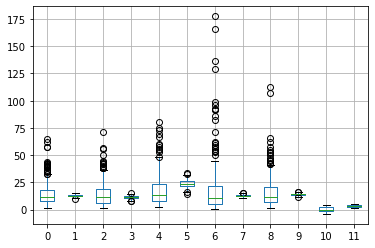

In [12]:
boxplot = samples_df.boxplot()

#### We can see that features 0 to 9 are metric, and features 10 and 11 are discrete. More on this in 1.5
#### We try the automatic method of isolation forrest (only on metric columns):

In [13]:
# only consider metric columns
cols = [0,1,2,3,4,5,6,7,8,9]

columns_metric = samples_df[cols]

outlier_detector = IsolationForest(n_estimators=500, random_state=rng, contamination='auto')
outlier_detector.fit(columns_metric)
samples_df['outlier_mask'] = outlier_detector.predict(columns_metric)

In [14]:
samples_df['outlier_mask'].value_counts()

 1    224
-1     19
Name: outlier_mask, dtype: int64

#### Isolation forrest indicates 19 outliers. Since we don't want to delete these 19 samples, we first take a closer look at the features and see if those outliers really seem meaningful. Just because they are statistical outliers doesn't mean they are realy outliers in the real world (e.g. some people are really fat and we dont want to delete their data because of this).

In [15]:
# drop this for now
samples_df = samples_df.drop(columns=['outlier_mask'])

### 1.3 Features


In [16]:
# descriptives
samples_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,14.712144,12.923540,14.643995,11.237620,17.531760,23.746942,19.034259,12.707631,16.808096,14.004964,0.226337,2.954733
std,10.835015,0.973294,11.408464,1.292350,14.529121,3.043635,25.606963,0.833956,15.529250,0.920047,1.890113,1.452416
min,1.090835,9.889231,1.266706,7.672468,1.978016,13.993093,0.230881,10.616928,1.362240,11.378704,-4.000000,1.000000
25%,8.083172,12.187192,6.324121,10.420516,7.564576,21.933736,5.229260,12.124356,6.561588,13.408840,-1.000000,2.000000
50%,11.525520,12.844275,11.111802,11.183974,13.078607,23.804331,10.316726,12.643258,11.626401,13.952020,0.000000,3.000000
75%,17.816625,13.619470,18.679912,12.140556,23.729398,25.784318,21.665984,13.264043,20.571611,14.562748,2.000000,4.000000
max,64.792040,15.276706,71.422421,15.432175,80.706103,33.330952,177.572884,15.204299,112.458023,16.413580,4.000000,5.000000


Feature 0:



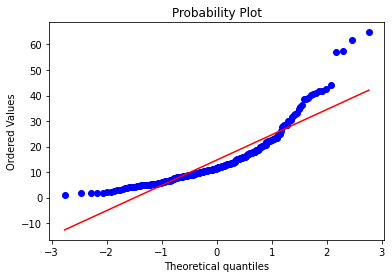

Feature 1:



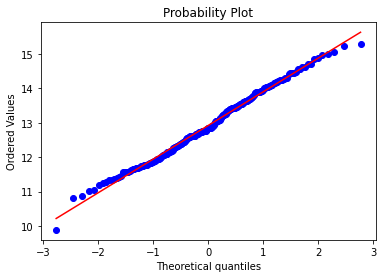

Feature 2:



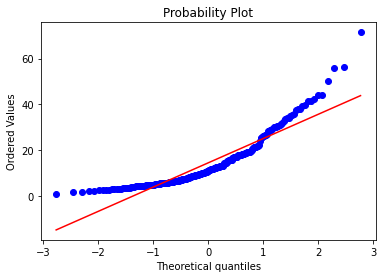

Feature 3:



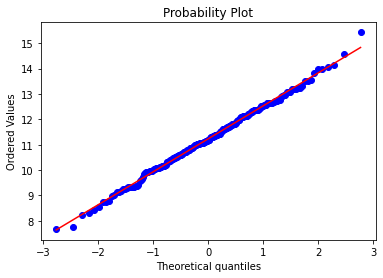

Feature 4:



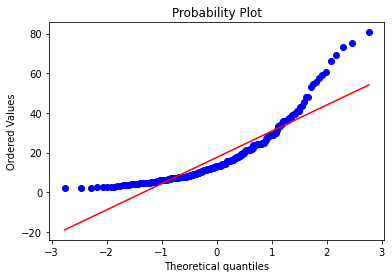

Feature 5:



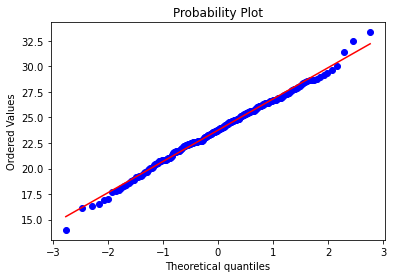

Feature 6:



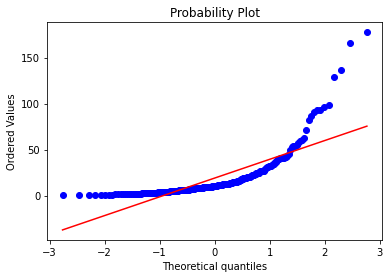

Feature 7:



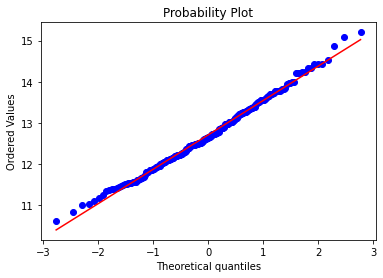

Feature 8:



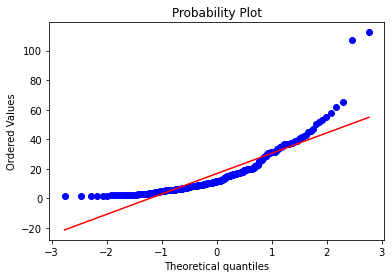

Feature 9:



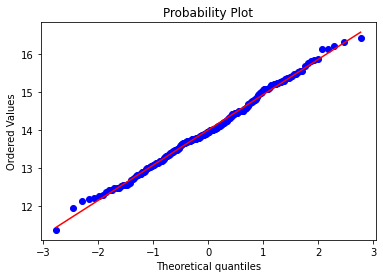

Feature 10:



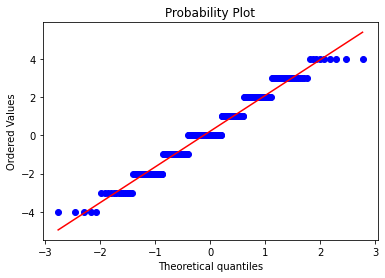

Feature 11:



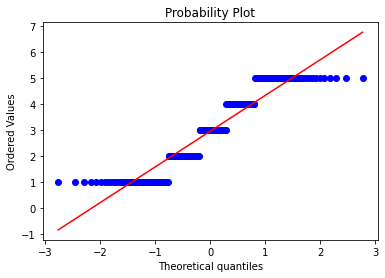

In [17]:
# Q-Q Plots for all features
for col in samples_df.columns:
    print("Feature {}:\n".format(col))
    sts.probplot(samples_df[col], dist="norm", plot=plt)
    plt.show()

#### Three groups of features identified:
 
 - Features 0, 2, 4, 6, 8 are continuous and not normally distributed. Ranges (displayed in descriptive table in beginning of 1.3) for these features are far apart with large standarddeviations around 15 on average.
 - Features 1, 3, 5, 7, 9 are continuous and normally distributed. Ranges for these features are much closer together with a standarddeviation around 1. All these features are skewed to the right, indicated by the mean being greater than the median and displayed in the boxplots.
 - Features 10 and 11 are discretely distributed.
 
  
From experience in statistics we know that skewed features like the first identified group can be normalized by taking the logarithm of the values. Those distributions often arise from values that are capped at the bottom and open to the top (such as money).

In [18]:
# LOG TRANSFORMATION
samples_df[0] = np.log(samples_df[0])
samples_df[2] = np.log(samples_df[2])
samples_df[4] = np.log(samples_df[4])
samples_df[6] = np.log(samples_df[6])
samples_df[8] = np.log(samples_df[8])

Feature 0:



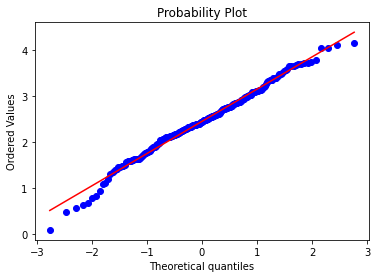

Feature 1:



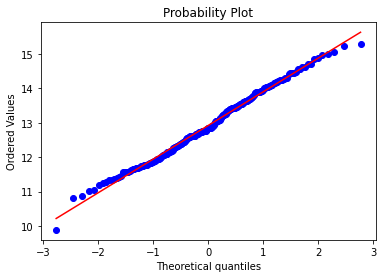

Feature 2:



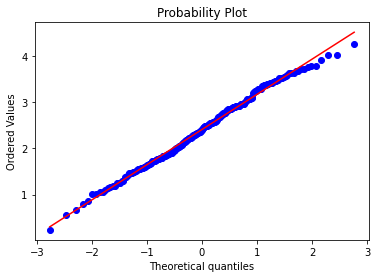

Feature 3:



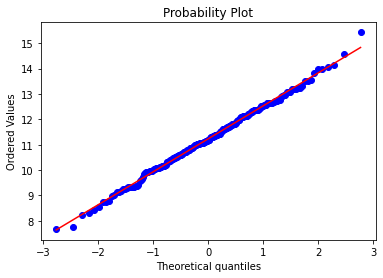

Feature 4:



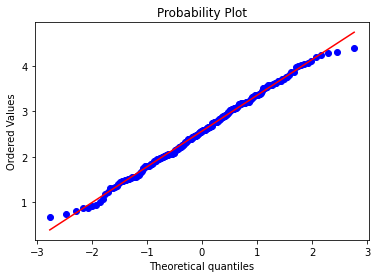

Feature 5:



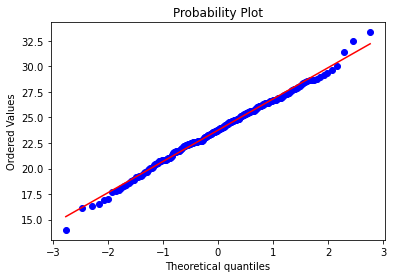

Feature 6:



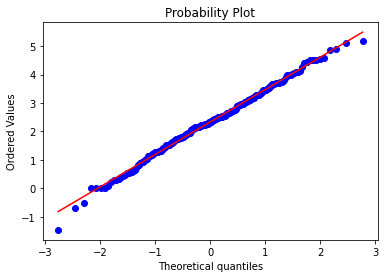

Feature 7:



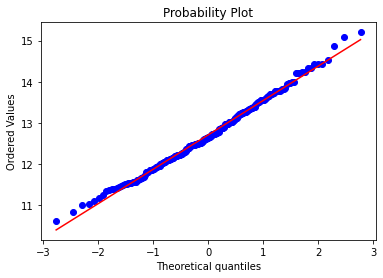

Feature 8:



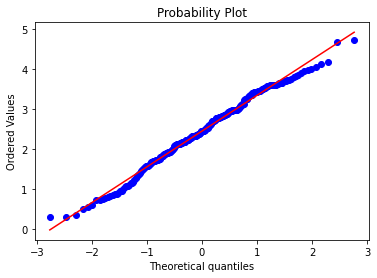

Feature 9:



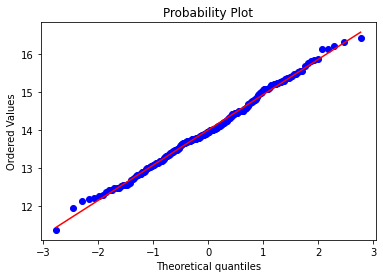

Feature 10:



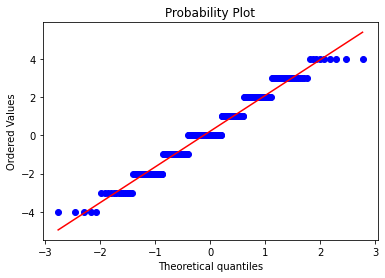

Feature 11:



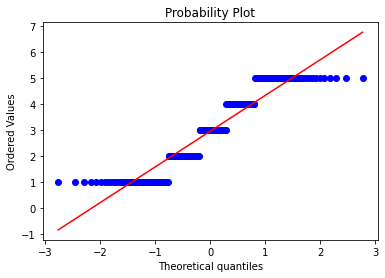

In [19]:
# Q-Q Plots for all features
for col in samples_df.columns:
    print("Feature {}:\n".format(col))
    sts.probplot(samples_df[col], dist="norm", plot=plt)
    plt.show()

#### Looks much better! Some outliers might be at the bottom or top of some features but overall it looks much more normal. Let's do normality tests:

In [20]:
# normality test for continuous features
# testing H0: distribution is normal; reject (small p) --> data is not normal
for col in samples_df.iloc[:,[0,1,2,3,4,5,6,7,8,9]].columns:
    k2, p = sts.normaltest(samples_df[col])
    print("feature", col, "p-value equals:",'{0:.10f}'.format(p),
         "  H_0 rejected --> not normally distributed" if p < 0.05 else "  H_0 not rejected")

feature 0 p-value equals: 0.0690054066   H_0 not rejected
feature 1 p-value equals: 0.3500003703   H_0 not rejected
feature 2 p-value equals: 0.2013811654   H_0 not rejected
feature 3 p-value equals: 0.8251721335   H_0 not rejected
feature 4 p-value equals: 0.3044544267   H_0 not rejected
feature 5 p-value equals: 0.3816700760   H_0 not rejected
feature 6 p-value equals: 0.4750501268   H_0 not rejected
feature 7 p-value equals: 0.2617013953   H_0 not rejected
feature 8 p-value equals: 0.2112585404   H_0 not rejected
feature 9 p-value equals: 0.6749113084   H_0 not rejected


#### By class:

In [21]:
# normality test for continuous features by class
for col in samples_df.iloc[:,[0,1,2,3,4,5,6,7,8,9]].columns:
    for cls in [0,1,2]:
        k2, p = sts.normaltest(samples_df[col][labels_df[0] == cls])
        print("feature:", col, "class", cls, "p-value equals:",'{0:.10f}'.format(p), 
              "  H_0 rejected --> not normally distributed" if p < 0.05 else "  H_0 not rejected")
    print("\n")

feature: 0 class 0 p-value equals: 0.1372815577   H_0 not rejected
feature: 0 class 1 p-value equals: 0.4248622747   H_0 not rejected
feature: 0 class 2 p-value equals: 0.5894466855   H_0 not rejected


feature: 1 class 0 p-value equals: 0.7463189363   H_0 not rejected
feature: 1 class 1 p-value equals: 0.8483290424   H_0 not rejected
feature: 1 class 2 p-value equals: 0.0912263515   H_0 not rejected


feature: 2 class 0 p-value equals: 0.4424140824   H_0 not rejected
feature: 2 class 1 p-value equals: 0.0174410232   H_0 rejected --> not normally distributed
feature: 2 class 2 p-value equals: 0.9175012349   H_0 not rejected


feature: 3 class 0 p-value equals: 0.7575236822   H_0 not rejected
feature: 3 class 1 p-value equals: 0.4089728525   H_0 not rejected
feature: 3 class 2 p-value equals: 0.7680672343   H_0 not rejected


feature: 4 class 0 p-value equals: 0.2452977743   H_0 not rejected
feature: 4 class 1 p-value equals: 0.7881954152   H_0 not rejected
feature: 4 class 2 p-value eq

#### Indeed, now all features are normally distributed (at least we have no evidence for the opposite). Even for each class all features are normally distributed with one exception for feature 2 and class 1.

#### Let's also have a look at the discrete features:

feature 10 :
  0.0    58
 1.0    36
-1.0    36
 2.0    34
-2.0    28
 3.0    23
-3.0    14
 4.0     9
-4.0     5
Name: 10, dtype: int64


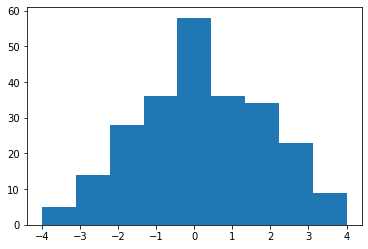

feature 11 :
 1.0    54
5.0    51
2.0    48
3.0    47
4.0    43
Name: 11, dtype: int64


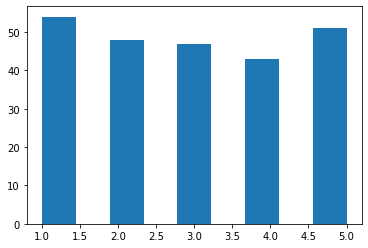

In [22]:
# histogram and value_counts() for discrete variables
discrete_features = [10,11]

for feat in samples_df[discrete_features]:
    print("feature", feat, ":\n",samples_df[feat].value_counts())
    plt.hist(samples_df[feat], align='mid', bins='auto')
    plt.show()

#### The two groups of continuous features have means close to each other within each group. We plot boxplots seperately for better visability.

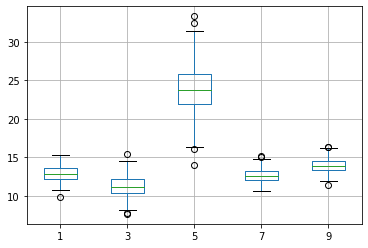

In [23]:
# features without evidence for not-normal distribution
bxplt = samples_df.iloc[:,[1,3,5,7,9]].boxplot()

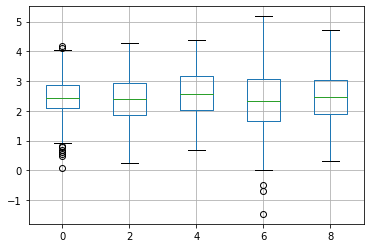

In [24]:
# features not normally distributed
bxplt = samples_df.iloc[:,[0,2,4,6,8]].boxplot()

#### Some outliers might still be present. We want to evaluate the impackt of imputation on these values in Task 2.

### 1.4 Scatter-Plot

#### First two features with very small correlation between them (we checked correlations before because this seems the better way to start analysis. Correlations are displayed in 1.5) The relation to the ground truth is displayed by the color of the dots - the classes.

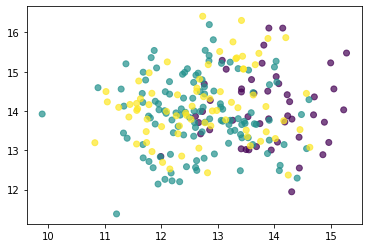

In [25]:
plot = plt.scatter(samples_df[1],samples_df[9],c = labels_df[0].to_numpy(), cmap='viridis',alpha=0.7)

#### Next two features with high correlation between them

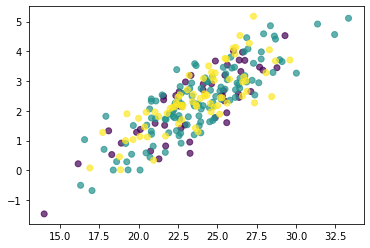

In [26]:
plot = plt.scatter(samples_df[5],samples_df[6],c = labels_df[0].to_numpy(), cmap='viridis',alpha=0.7)

#### We also want to look at the two discrete features. These also correlate highly (between themselves as well as with the labels)

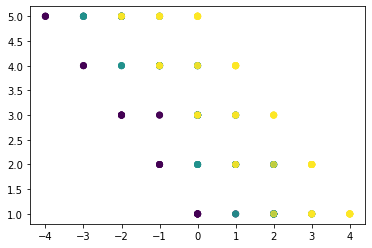

In [27]:
plot = plt.scatter(samples_df[10],samples_df[11],c = labels_df[0].to_numpy(), cmap='viridis',alpha=0.7)

#### Lastly we look at feature 1 and 10 because these have the highest correlation to the labels.

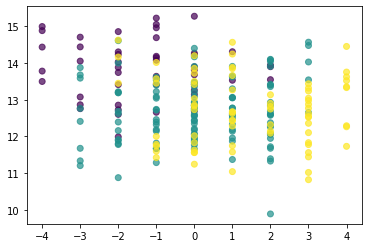

In [28]:
plot = plt.scatter(samples_df[10],samples_df[1],c = labels_df[0].to_numpy(), cmap='viridis',alpha=0.7)

### 1.5 Relation

In [29]:
# include labels when looking at the correlations
samples_df['labels'] = labels_df[0]

# correlate features with nonparametric spearman because of discrete features
samples_df.iloc[:,0:14].corr(method='spearman').round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,labels
0,1.00,-0.23,0.03,-0.33,-0.10,0.44,0.23,0.24,0.31,-0.11,0.00,-0.03,0.01
1,-0.23,1.00,0.10,0.07,0.19,0.03,-0.02,-0.02,-0.06,0.03,-0.15,-0.09,-0.34
2,0.03,0.10,1.00,-0.04,-0.10,0.13,0.19,0.40,-0.08,-0.07,0.01,-0.05,-0.02
3,-0.33,0.07,-0.04,1.00,0.36,-0.63,-0.45,-0.28,-0.13,0.06,-0.17,-0.06,-0.43
4,-0.10,0.19,-0.10,0.36,1.00,-0.51,-0.31,-0.55,0.08,0.17,0.01,-0.04,-0.02
5,0.44,0.03,0.13,-0.63,-0.51,1.00,0.81,0.22,0.12,-0.20,-0.00,-0.02,-0.00
6,0.23,-0.02,0.19,-0.45,-0.31,0.81,1.00,0.09,0.29,-0.13,0.03,-0.06,0.03
7,0.24,-0.02,0.40,-0.28,-0.55,0.22,0.09,1.00,-0.11,-0.04,0.02,-0.01,0.02
8,0.31,-0.06,-0.08,-0.13,0.08,0.12,0.29,-0.11,1.00,-0.16,-0.03,-0.02,-0.02
9,-0.11,0.03,-0.07,0.06,0.17,-0.20,-0.13,-0.04,-0.16,1.00,0.09,-0.06,0.05


#### Visualize for better readability

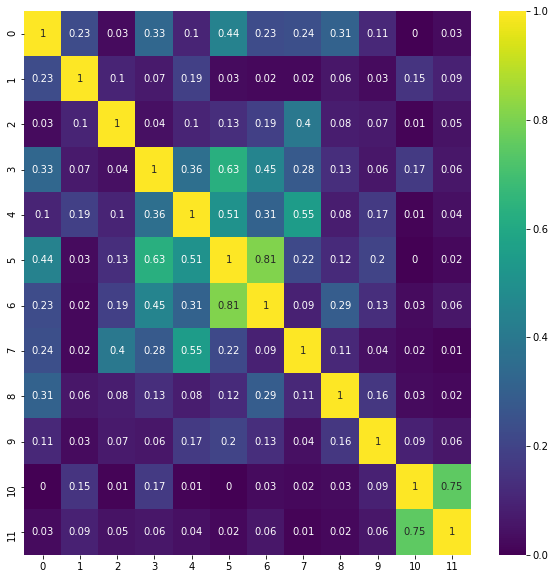

In [30]:
# plot absolute values because we are only interested in strength not direction at this point
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(samples_df.iloc[:,0:12].corr(method='spearman').round(2).abs(), 
            annot=True, cmap='viridis')
plt.show()

##### Conclusion:

Not all features are independent from another, some multicollinearity exists. Some classifiers (e.g. Naives Bayes) assume that features are independent from another. This assumption is violated in the data. Since no single feature shows correlations to many other features, we decide that a dimension reduction like PCA is not necessary.

The connection to Task 1.4 has been made in 1.4 because it made for sense in our minds.

# Task 2: Classification

### 2.1 Evaluation

We employ a cross-validation. For splitting the data into training and test data we use the StratifiedShuffleSplit because classes differ in size (stratified) and are ordered (shuffle). This will be done within the *main* function

In [31]:
# splitter passed to classification main function
splitter = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=rng)

### 2.2 Metrics

We will evaluate the classification performance with accuracy, precision, recall and F1-scores. Mean values of these across the splits will be displayed by the *printMetrics* and *plotMetrics* functions. The corresponding confusion-matrices will be displayed by the main function for every data-split.

In [32]:
# passed to main function to be displayed in plots
metrics_names = ["Accuracy", "Precision", "Recall ", "F-score"]

In [33]:
# functions from the course material
def confusionMatrix(prediction, reference):
    classes=np.unique(reference)
    matrix = np.zeros((len(classes),len(classes)))
    for s in range(len(reference)):
        matrix[reference[s],prediction[s]]+=1
    return matrix

def accuracy(prediction, reference):
    correct = np.sum(prediction==reference)   
    return float(correct)/len(reference)

def precision(prediction,reference,label):
    tp=np.sum(prediction[reference==label]==
              reference[reference==label])
    fp=np.sum(prediction[reference!=label]==label)
    return float(tp)/(tp+fp)

def recall(prediction,reference,label):
    tp=np.sum(prediction[reference==label]==
              reference[reference==label])
    fn=len(reference[reference==label])-tp
    return float(tp)/(tp+fn)

def fscore(prediction,reference,label):
    prec=precision(prediction,reference,label)
    rec=recall(prediction,reference,label)
    return 2*(prec*rec)/(prec+rec)

In [34]:
def printMetrics(classifiers, results, resultsSD):
    for nam, row, sd in zip(classifiers, results, resultsSD):
        print('\n>>>', nam, '<<<')
        for metr, val, std in zip(metrics_names, row, sd):
            print(metr,"\tMean:", round((val), 3), "\tSD:", round((std), 3))

# bar graph of the results // errorbars = 1 SD
def plotMetrics(classifiers, names, results, resultsSD):
    i = 0
    for name, clf in zip(names, classifiers):
        # make subplot
        ax = plt.subplot(1,len(classifiers),i+1)
        ax.bar(metrics_names, results[i,:],
              color=['#003f5c', '#7a5195', '#ef5675', '#ffa600'], yerr=resultsSD[i,:], capsize=5)
        ax.set_ylim(0, 1)
        ax.set_title(name, fontsize=15)
        i+=1
    # print figure    
    plt.rcParams["figure.figsize"] = (10,5)
    plt.show()

### 2.3 Classifiers

We chose discriminative classifiers because we have a ground-truth to predict and want to model the decision boundaries. We then chose one linear and one nonlinear classifier. The one should be parametric, the other one nonparametric. We normalize the metric features in the preprocessing, but there are still two discrete features, thats why we want to make this comparison between the two groups of classifiers.


Thus we chose: K-Nearest-Neighbour; Linear-SVC

In [35]:
# names of classifiers (for plotting)
names = ["Nearest Neighbors (5)", "Linear SVC"]

# classifiers used
classifiers = [
    KNeighborsClassifier(5),
    SVC(kernel="linear", C=0.025)
    ]

### 2.4 Preprocessing




#### We always exclude the seven measurement errors (also on test data!). Our three chosen configurations are:
- 1) No further preprocessing (because we want to compare classification performance to this)
- 2) Log transform the skewed features (to normalize features, explained in 1.3)
- 3) Remove outliers on transformed features (we do not consider these outliers meaningful since they follow the overall trajectory but still want to check effects of removing by 1.5*IQR rule)

##### Interpret findings is part of 2.6?!

In [36]:
# read data, discard Task 1 changes
samples_raw = pd.read_csv("samples_ss21.csv", header=None)
labels_raw = pd.read_csv("labels_ss21.csv", header=None)

#### Eventhough we shell only treat outliers on training data, these seven outliers are so blatantly obvious on all features that we decided to delete them preemptively (also on test data)

In [37]:
# delete all obvious measurement errors we identified
labels_raw = labels_raw.drop(samples_raw[ samples_raw[0] < -900 ].index)

# drop rows with obvious measurement errors from all analysis
samples_raw.drop( samples_raw[ samples_raw[0] < -900 ].index , inplace=True)

In [38]:
labels_raw.value_counts()

1.0    120
2.0     75
0.0     48
dtype: int64

#### Dataframes for configuration 1 & 2 (3 will be done in *treatOutlier*  function, called within main function)

In [39]:
# Configuration 1
samples_1 = samples_raw.copy()

# Configuration 2
# see 1.3 for details
samples_2 = samples_raw.copy()
samples_2[0] = np.log(samples_2[0])
samples_2[2] = np.log(samples_2[2])
samples_2[4] = np.log(samples_2[4])
samples_2[6] = np.log(samples_2[6])
samples_2[8] = np.log(samples_2[8])

In [40]:
# replaces outliers (defined as Q3/Q1 +- 1.5*IQR) by median value of feature
# used for configuration 3
# discrete features will be ignored since values will never exceed the +- 1.5*IQR so we left them in

def treatOutlier(data):
 
    # iterate over transposed matrix to access columns
    for i in range(len(data.T)):
        Q1 = np.percentile(data.T[i], 25) 
        Q3 = np.percentile(data.T[i], 75) 

        IQR = Q3 - Q1

        colMedian = np.median(data.T[i])

        #print("outlier count for this iteration:", sum((data.T[i] > (Q3 + 1.5 * IQR)) | (data.T[i] < (Q1 - 1.5 * IQR)))) #testing
        
        data.T[i] = np.where((data.T[i] > (Q3 + 1.5 * IQR)) | (data.T[i] < (Q1 - 1.5 * IQR)), colMedian, data.T[i])

    return data

### 2.5 Optimization

We decided to manually choose hyperparameters because we already cross-validate on the datasplits. For the KNN we considered k = 3 | 5 | 7, where 5 had the best performance. Naturally we only considered odd numbers so the classifier can actually choose a neighbor. For the SVC we expected the the linear kernal to perform best from what we learned in Task 1, and indeed it performs bettern than the radial kernal. (Results not printed due to length of output)

### 2.6 Comparison

In [41]:
# main function for classification
def main(classifiers_, names_, splitter_, X_, y_, outlierFlag):

    # will contain all metrics 2d arrays for each of the splits of the data
    result = [] 
    
    # counterOuter
    j = 1
    
    # iterate over all stratified splits of the data
    for train_index, test_index in splitter_.split(X_, y_):
        X_train, X_test = X_[train_index], X_[test_index]
        y_train, y_test = y_[train_index], y_[test_index]
        
        # treat outliers for configuration 3
        if(outlierFlag):
            X_train = treatOutlier(X_train)
        
        # counterInner
        i = 0

        # initialize and fill matrix / 2D-Array
        metrics = np.zeros(shape=(len(classifiers), len(metrics_names)), dtype=float)

        print("Confusion Matrices for iteration of split:", j)
        j += 1
        
        # iterate all classifiers
        for clf in classifiers_:
          
            # fit classifier and make prediction
            clf.fit( X_train, y_train )
            pred = clf.predict(X_test)

            print(clf, "\n", confusion_matrix(pred, y_test))
            # calculate metrics and save to array
            metrics[i,0] = accuracy(pred, y_test)
            metrics[i,1] = precision(pred, y_test, 0)
            metrics[i,2] = recall(pred, y_test, 0)
            metrics[i,3] = fscore(pred, y_test, 0)
            i+=1

        # contains metrics table for each round of data split
        result.append(metrics) 

    # average cell wise across all 2d arrays in result list
    # -> puts all 2d arrays into 3d array and averages over new dimension
    output = np.stack(result).mean(axis=0) 
    
    # standard deviation for significance test
    outputSD = np.stack(result).std(axis=0)
    
    # print and plot average results of data split across all classifiers
    print('\n\nMean evaluation scores, errorbars indicate one standard deviation:')
    plotMetrics(classifiers_, names_, output, outputSD)
    printMetrics(names_, output, outputSD)

Confusion Matrices for iteration of split: 1
KNeighborsClassifier() 
 [[ 7 11  6]
 [ 6 20 14]
 [ 1  5  3]]
SVC(C=0.025, kernel='linear') 
 [[ 9  4  0]
 [ 5 29  3]
 [ 0  3 20]]
Confusion Matrices for iteration of split: 2
KNeighborsClassifier() 
 [[ 6  2  3]
 [ 7 27 17]
 [ 1  7  3]]
SVC(C=0.025, kernel='linear') 
 [[10  2  1]
 [ 4 31  5]
 [ 0  3 17]]
Confusion Matrices for iteration of split: 3
KNeighborsClassifier() 
 [[ 3  6  4]
 [ 9 27 13]
 [ 2  3  6]]
SVC(C=0.025, kernel='linear') 
 [[ 9  2  1]
 [ 5 32  5]
 [ 0  2 17]]
Confusion Matrices for iteration of split: 4
KNeighborsClassifier() 
 [[ 2  5  6]
 [ 9 27 13]
 [ 3  4  4]]
SVC(C=0.025, kernel='linear') 
 [[10  1  0]
 [ 4 30  5]
 [ 0  5 18]]
Confusion Matrices for iteration of split: 5
KNeighborsClassifier() 
 [[ 5  4  3]
 [ 8 28 15]
 [ 1  4  5]]
SVC(C=0.025, kernel='linear') 
 [[ 9  1  0]
 [ 5 32  4]
 [ 0  3 19]]


Mean evaluation scores, errorbars indicate one standard deviation:


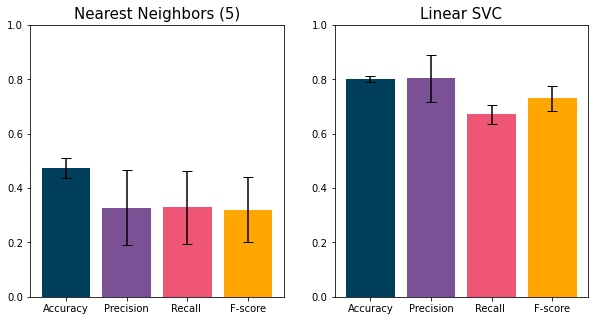


>>> Nearest Neighbors (5) <<<
Accuracy 	Mean: 0.474 	SD: 0.038
Precision 	Mean: 0.328 	SD: 0.139
Recall  	Mean: 0.329 	SD: 0.132
F-score 	Mean: 0.321 	SD: 0.119

>>> Linear SVC <<<
Accuracy 	Mean: 0.8 	SD: 0.011
Precision 	Mean: 0.804 	SD: 0.086
Recall  	Mean: 0.671 	SD: 0.035
F-score 	Mean: 0.73 	SD: 0.047


In [45]:
# Configuration 1
X = samples_1.values 
y = labels_raw.values[:,0]

main(classifiers, names, splitter, X, y, False)

Confusion Matrices for iteration of split: 1
KNeighborsClassifier() 
 [[ 6  3  1]
 [ 8 32  6]
 [ 0  1 16]]
SVC(C=0.025, kernel='linear') 
 [[10  1  0]
 [ 4 33  3]
 [ 0  2 20]]
Confusion Matrices for iteration of split: 2
KNeighborsClassifier() 
 [[ 7  4  0]
 [ 6 28 12]
 [ 1  4 11]]
SVC(C=0.025, kernel='linear') 
 [[11  3  0]
 [ 3 30  3]
 [ 0  3 20]]
Confusion Matrices for iteration of split: 3
KNeighborsClassifier() 
 [[ 4  2  0]
 [ 9 32 10]
 [ 1  2 13]]
SVC(C=0.025, kernel='linear') 
 [[ 9  1  1]
 [ 5 33  4]
 [ 0  2 18]]
Confusion Matrices for iteration of split: 4
KNeighborsClassifier() 
 [[ 5  5  0]
 [ 9 29  7]
 [ 0  2 16]]
SVC(C=0.025, kernel='linear') 
 [[ 7  0  0]
 [ 7 30  4]
 [ 0  6 19]]
Confusion Matrices for iteration of split: 5
KNeighborsClassifier() 
 [[ 5  4  1]
 [ 8 31  9]
 [ 1  1 13]]
SVC(C=0.025, kernel='linear') 
 [[ 9  2  0]
 [ 5 29  4]
 [ 0  5 19]]


Mean evaluation scores, errorbars indicate one standard deviation:


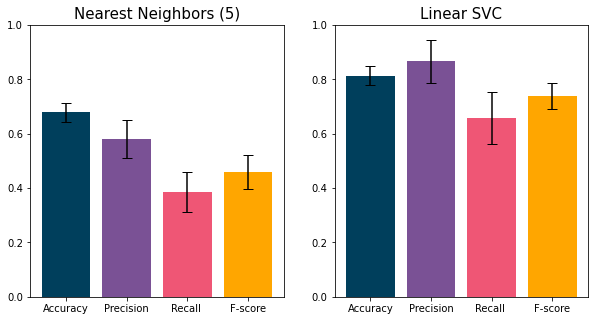


>>> Nearest Neighbors (5) <<<
Accuracy 	Mean: 0.679 	SD: 0.035
Precision 	Mean: 0.581 	SD: 0.069
Recall  	Mean: 0.386 	SD: 0.073
F-score 	Mean: 0.459 	SD: 0.062

>>> Linear SVC <<<
Accuracy 	Mean: 0.814 	SD: 0.035
Precision 	Mean: 0.866 	SD: 0.079
Recall  	Mean: 0.657 	SD: 0.095
F-score 	Mean: 0.738 	SD: 0.049


In [43]:
# Configuration 2
X = samples_2.values 
y = labels_raw.values[:,0]

main(classifiers, names, splitter, X, y, False)

Confusion Matrices for iteration of split: 1
KNeighborsClassifier() 
 [[ 5  3  1]
 [ 9 32  5]
 [ 0  1 17]]
SVC(C=0.025, kernel='linear') 
 [[10  1  0]
 [ 4 33  4]
 [ 0  2 19]]
Confusion Matrices for iteration of split: 2
KNeighborsClassifier() 
 [[ 8  4  0]
 [ 6 27 12]
 [ 0  5 11]]
SVC(C=0.025, kernel='linear') 
 [[11  3  0]
 [ 3 29  3]
 [ 0  4 20]]
Confusion Matrices for iteration of split: 3
KNeighborsClassifier() 
 [[ 5  1  0]
 [ 8 33  7]
 [ 1  2 16]]
SVC(C=0.025, kernel='linear') 
 [[ 9  1  1]
 [ 5 33  2]
 [ 0  2 20]]
Confusion Matrices for iteration of split: 4
KNeighborsClassifier() 
 [[ 5  5  0]
 [ 9 30  7]
 [ 0  1 16]]
SVC(C=0.025, kernel='linear') 
 [[ 8  1  0]
 [ 6 30  3]
 [ 0  5 20]]
Confusion Matrices for iteration of split: 5
KNeighborsClassifier() 
 [[ 5  4  1]
 [ 8 31  9]
 [ 1  1 13]]
SVC(C=0.025, kernel='linear') 
 [[ 9  1  0]
 [ 5 32  4]
 [ 0  3 19]]


Mean evaluation scores, errorbars indicate one standard deviation:


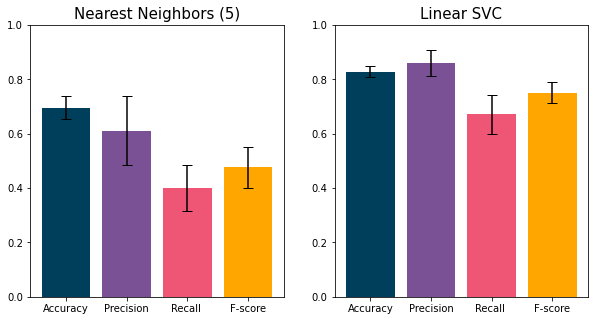


>>> Nearest Neighbors (5) <<<
Accuracy 	Mean: 0.696 	SD: 0.042
Precision 	Mean: 0.611 	SD: 0.127
Recall  	Mean: 0.4 	SD: 0.086
F-score 	Mean: 0.477 	SD: 0.076

>>> Linear SVC <<<
Accuracy 	Mean: 0.827 	SD: 0.021
Precision 	Mean: 0.86 	SD: 0.049
Recall  	Mean: 0.671 	SD: 0.073
F-score 	Mean: 0.75 	SD: 0.039


In [44]:
# Configuration 3 -> outlier flag True
X = samples_2.values 
y = labels_raw.values[:,0]

main(classifiers, names, splitter, X, y, True)

##### Significance of differences
Differences are tested with an independent samples T-Test, assuming no equal population variances between configuration, and same variances within configurations.
We only compare Accuracy and Fscore (since Fscore is the harmonic mean of recall and precision). Significance level was set at p < .05

In [46]:
# Configuration 1 distributions
acc_KNN_1 = sts.norm.rvs(loc=0.474, scale=0.038, size=5, random_state=rng)
f1c_KNN_1 = sts.norm.rvs(loc=0.321, scale=0.119, size=5, random_state=rng)

acc_SVC_1 = sts.norm.rvs(loc=0.8,   scale=0.011, size=5, random_state=rng)
f1c_SVC_1 = sts.norm.rvs(loc=0.73,  scale=0.047, size=5, random_state=rng)

# Configuration 2 distributions
acc_KNN_2 = sts.norm.rvs(loc=0.679, scale=0.035, size=5, random_state=rng)
f1c_KNN_2 = sts.norm.rvs(loc=0.459, scale=0.062, size=5, random_state=rng)

acc_SVC_2 = sts.norm.rvs(loc=0.814, scale=0.035, size=5, random_state=rng)
f1c_SVC_2 = sts.norm.rvs(loc=0.738, scale=0.049, size=5, random_state=rng)

# Configuration 3 distributions
acc_KNN_3 = sts.norm.rvs(loc=0.696, scale=0.042, size=5, random_state=rng)
f1c_KNN_3 = sts.norm.rvs(loc=0.477, scale=0.076, size=5, random_state=rng)

acc_SVC_3 = sts.norm.rvs(loc=0.827, scale=0.021, size=5, random_state=rng)
f1c_SVC_3 = sts.norm.rvs(loc=0.75,  scale=0.039, size=5, random_state=rng)

In [47]:
# Test H0: equal means, reject if p < .05

# Between Configurations:
# 1 vs 2
print("Accuracy KNN configuration1 vs configuration2: p = ", f"{sts.ttest_ind(acc_KNN_1, acc_KNN_2, equal_var=False).pvalue:.3f}")
print("F1-Score KNN configuration1 vs configuration2: p = ", f"{sts.ttest_ind(f1c_KNN_1, f1c_KNN_2, equal_var=False).pvalue:.3f}")
print("Accuracy SVC configuration1 vs configuration2: p = ", f"{sts.ttest_ind(acc_SVC_1, acc_SVC_2, equal_var=False).pvalue:.3f}")
print("F1-Score SVC configuration1 vs configuration2: p = ", f"{sts.ttest_ind(f1c_SVC_1, f1c_SVC_2, equal_var=False).pvalue:.3f}", "\n")

# 1 vs 3
print("Accuracy KNN configuration1 vs configuration3: p = ", f"{sts.ttest_ind(acc_KNN_1, acc_KNN_3, equal_var=False).pvalue:.3f}")
print("F1-Score KNN configuration1 vs configuration3: p = ", f"{sts.ttest_ind(f1c_KNN_1, f1c_KNN_3, equal_var=False).pvalue:.3f}")
print("Accuracy SVC configuration1 vs configuration3: p = ", f"{sts.ttest_ind(acc_SVC_1, acc_SVC_3, equal_var=False).pvalue:.3f}")
print("F1-Score SVC configuration1 vs configuration3: p = ", f"{sts.ttest_ind(f1c_SVC_1, f1c_SVC_3, equal_var=False).pvalue:.3f}", "\n")

# 2 vs 3
print("Accuracy KNN configuration2 vs configuration3: p = ", f"{sts.ttest_ind(acc_KNN_2, acc_KNN_3, equal_var=False).pvalue:.3f}")
print("F1-Score KNN configuration2 vs configuration3: p = ", f"{sts.ttest_ind(f1c_KNN_2, f1c_KNN_3, equal_var=False).pvalue:.3f}")
print("Accuracy SVC configuration2 vs configuration3: p = ", f"{sts.ttest_ind(acc_SVC_2, acc_SVC_3, equal_var=False).pvalue:.3f}")
print("F1-Score SVC configuration2 vs configuration3: p = ", f"{sts.ttest_ind(f1c_SVC_2, f1c_SVC_3, equal_var=False).pvalue:.3f}", "\n")

Accuracy KNN configuration1 vs configuration2: p =  0.000
F1-Score KNN configuration1 vs configuration2: p =  0.046
Accuracy SVC configuration1 vs configuration2: p =  0.141
F1-Score SVC configuration1 vs configuration2: p =  0.723 

Accuracy KNN configuration1 vs configuration3: p =  0.000
F1-Score KNN configuration1 vs configuration3: p =  0.026
Accuracy SVC configuration1 vs configuration3: p =  0.010
F1-Score SVC configuration1 vs configuration3: p =  0.447 

Accuracy KNN configuration2 vs configuration3: p =  0.338
F1-Score KNN configuration2 vs configuration3: p =  0.522
Accuracy SVC configuration2 vs configuration3: p =  0.595
F1-Score SVC configuration2 vs configuration3: p =  0.711 



In [48]:
# Within Configurations, between classifiers:

# 1
print("Accuracy configuration1: KNN vs SVC: p = ", f"{sts.ttest_ind(acc_KNN_1, acc_SVC_1, equal_var=True).pvalue:.3f}")
print("F1-Score configuration1: KNN vs SVC: p = ", f"{sts.ttest_ind(f1c_KNN_1, f1c_SVC_1, equal_var=True).pvalue:.3f}", "\n")

# 2
print("Accuracy configuration2: KNN vs SVC: p = ", f"{sts.ttest_ind(acc_KNN_2, acc_SVC_2, equal_var=True).pvalue:.3f}")
print("F1-Score configuration2: KNN vs SVC: p = ", f"{sts.ttest_ind(f1c_KNN_2, f1c_SVC_2, equal_var=True).pvalue:.3f}", "\n")

# 3
print("Accuracy configuration3: KNN vs SVC: p = ", f"{sts.ttest_ind(acc_KNN_3, acc_SVC_3, equal_var=True).pvalue:.3f}")
print("F1-Score configuration3: KNN vs SVC: p = ", f"{sts.ttest_ind(f1c_KNN_3, f1c_SVC_3, equal_var=True).pvalue:.3f}", "\n")

Accuracy configuration1: KNN vs SVC: p =  0.000
F1-Score configuration1: KNN vs SVC: p =  0.000 

Accuracy configuration2: KNN vs SVC: p =  0.000
F1-Score configuration2: KNN vs SVC: p =  0.000 

Accuracy configuration3: KNN vs SVC: p =  0.000
F1-Score configuration3: KNN vs SVC: p =  0.000 



#### Significance of differences

Configuration 2 performed significantly better than configuration 1 with the KNN model on both accuracy and F-score. The SVC also performed better for configuration 2, differences were not significant though. Configuration 3 performed significantly better than configuration 1 on all measures except the F-score of the SVC. Classification performance for configuration 3 with the outliers removed was overall slightly better than just the feature normalization in configuration 2, but non of these differences were significant. Since there were not many outliers (as defined by our 1.5\*IQR Rule) it makes sence for the differences to be rather small.

Within each configuration we can see, that the SVC performed significantly better than the KNN classifier (all p<.001).

The dispersion of the results is overall relativly similiar, but the SVC tends to have slighly smaller variances.

Compared to the a-priori probabilities our classification performance is quite good. A classifier always blindly predicting our largest class (Class 1; 120/243 = 0,49% of cases) would have accuracy and recall scores of 0.49, so our results being between 0.65 and 0.82 is satisfactory.


# Task 3: Model inspection

### 3.1 Evaluation

We pick features (more on this in 3.4) and implement the single split.

In [49]:
# Same dataframe as configuration 2 of task 2
X = samples_2.iloc[:,[10,11]].values
y = labels_raw.values[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rng)

### 3.2 Classifier selection

We pick the linear SVC classifier because it performed well in Task 2, and due to the nature of the classifier we expect it to be good to visualize.

In [50]:
clf_taks3 = SVC(kernel="linear", C=0.025)

clf_taks3.fit( X_train, y_train )
pred = clf_taks3.predict(X_test)


### 3.3 Visual inspection

We chose features from which we learned in Task 1, that the classes are not evenly distributed on. In this way we expect the model to be able to classify the data even with only two features. Classification performance looks pretty good based on this plot.

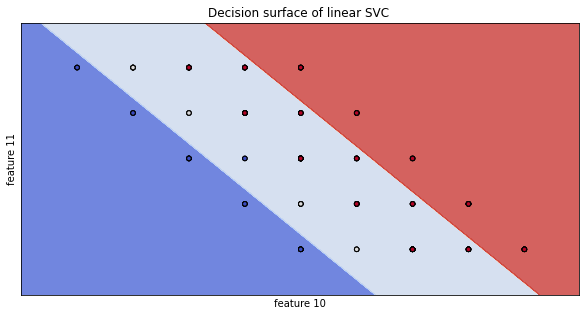

In [51]:
# reference for code of this plot: https://scikit-learn.org/0.18/auto_examples/svm/plot_iris.html

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
title = ('Decision surface of linear SVC ')

# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf_taks3, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('feature 11')
ax.set_xlabel('feature 10')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

### 3.4 Interpretation

With feature 10 and 11 alone we are able to draw decision boundaries for the three classes. In Task 1 we already learned that the classes are unevenly distributed on these features, so we expected them to perform well for the classification. As can be seen in the cell below, the accuracy is actually slightly better compared to the more suffisticated model in Task 2. It seems, that these two features alone can classify our labels as good as all features together, even with more outliers removed and normalization of features.

In [52]:
# accuracy for this model with only feature 10 and 11
accuracy(pred, y_test), fscore(pred, y_test, 0)

(0.8367346938775511, 0.7272727272727273)